<h1 align="center"> Statistics and Financial Data Analysis </h1>




In [1]:
%reset -f
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

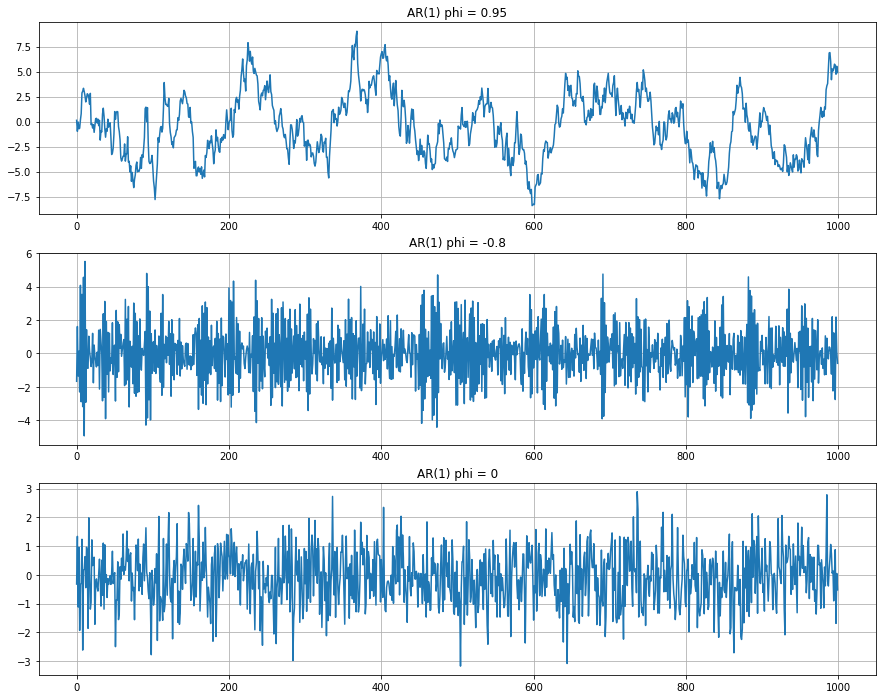

In [2]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.stattools as sm_tools
plt.figure(1, figsize=(15,12))

# AR for phi = 0.95
plt.subplot(3,1,1)
plt.title('AR(1) phi = 0.95')
phi = 0.95
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result1 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar1 = result1.generate_sample(nsample=1000)
plt.plot(data_ar1)
plt.grid()

# AR for phi = -0.8
plt.subplot(3,1,2)
plt.title('AR(1) phi = -0.8')
phi = -0.8
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2)
plt.grid()


# AR for phi = 0
plt.subplot(3,1,3)
plt.title('AR(1) phi = 0')
phi = 0
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result3 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar3 = result3.generate_sample(nsample=1000)
plt.plot(data_ar3)
plt.grid()

plt.show()

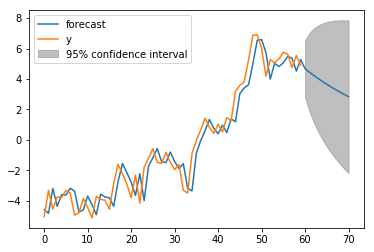

In [3]:
# See what happens when you scross through the data above for predict

mod = ARMA(data_ar1, order=(1,0))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.show()

Predicting AR(1) Coefficients with Regression
===

In [4]:
CiscoRtn = pd.read_csv('CiscoRet.csv', index_col = 0)

In [5]:
# Fit an AR(1) model to Cisco log returns data

model = ARMA(CiscoRtn.values, order=(1,0)) #Order of AR is 1, MA is 0.
AR1_res = model.fit()
print(AR1_res.summary());


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3227
Model:                     ARMA(1, 0)   Log Likelihood                8359.148
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 11 Nov 2020   AIC                         -16712.295
Time:                        23:05:47   BIC                         -16694.057
Sample:                             0   HQIC                        -16705.759
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.534      0.594      -0.000       0.001
ar.L1.y       -0.0380      0.018     -2.161      0.031      -0.073      -0.004
                                    Roots           

A note on 'method': the method can be an input to the 'fit' function. A from the help file:

method : str {'css-mle','mle','css'}
    This is the loglikelihood to maximize.  If "css-mle", the
    conditional sum of squares likelihood is maximized and its values
    are used as starting values for the computation of the exact
    likelihood via the Kalman filter.  If "mle", the exact likelihood
    is maximized via the Kalman Filter.  If "css" the conditional sum
    of squares likelihood is maximized.  All three methods use
    `start_params` as starting parameters.  See above for more
    information.

Excercise: split the data into Y_t = x_t and X_t = x_(t-1) and use a Linear Regression to idetnfiy const/AR parameters: $Y_t = c + \phi_1 X_t + \epsilon$

In [6]:
?ARMA.fit

In [7]:
AR1_res.params

array([ 0.00016426, -0.03802228])

In [8]:
?arma_order_select_ic

In [9]:
best_model = arma_order_select_ic(CiscoRtn.values, max_ar = 6, max_ma =0, ic=['aic', 'bic']) 

In [10]:
best_model

{'aic':               0
 0 -16709.627673
 1 -16712.295025
 2 -16718.372411
 3 -16716.602918
 4 -16719.668202
 5 -16718.850594
 6 -16717.725754, 'bic':               0
 0 -16697.469057
 1 -16694.057101
 2 -16694.055179
 3 -16686.206377
 4 -16683.192353
 5 -16676.295436
 6 -16669.091289, 'aic_min_order': (4, 0), 'bic_min_order': (0, 0)}

In [11]:
print('AIC Best: ',best_model.aic_min_order)
print('BIC Best: ',best_model.bic_min_order)

AIC Best:  (4, 0)
BIC Best:  (0, 0)


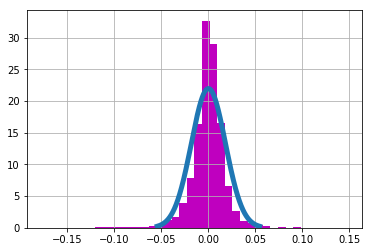

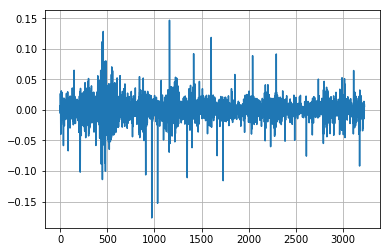

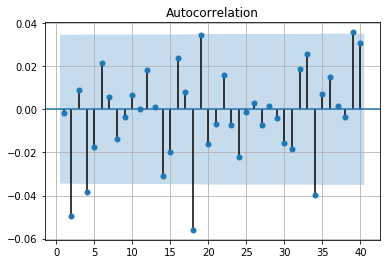

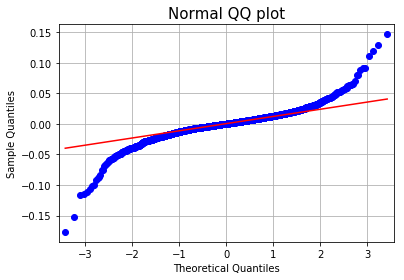

In [12]:
#Returning to AR(1) fitted model and checking for Residual characteristics

resid = AR1_res.resid #residuals
plt.hist(resid, bins =40,color='m', density = True)
mu = resid.mean()
sigma = resid.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
plt.grid()
plt.show()
plt.plot(resid)
plt.grid()
plt.show()
plot_acf(resid,lags=40,zero=False)
plt.grid()
# And not quite normal
fig = sm.qqplot(AR1_res.resid, line='q')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

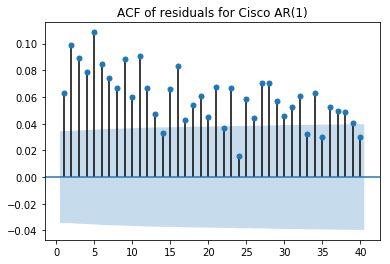

In [13]:
plot_acf(resid**2, lags = 40,zero =False)
plt.title('ACF of residuals for Cisco AR(1)')
plt.show()

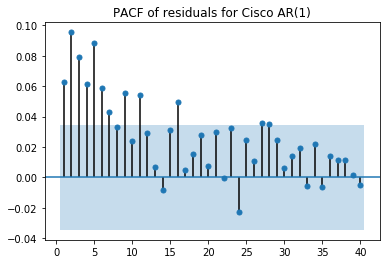

In [14]:
plot_pacf(resid**2, lags = 40,zero =False)
plt.title('PACF of residuals for Cisco AR(1)')
plt.show()

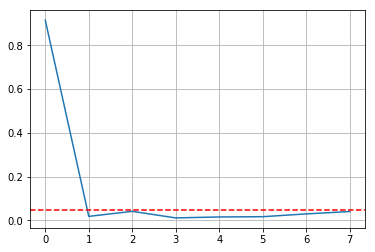

0.040803922285435536

In [15]:
# p-values for terms above 0 of ACF residulas are below 5%

lags = m.floor(np.log(len(resid)))
ljbox_test_res_ciscoAR1 = sm.stats.acorr_ljungbox(resid,lags)
plt.plot(ljbox_test_res_ciscoAR1[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()
ljbox_test_res_ciscoAR1[1][7]

In [16]:
ljbox_test_res_ciscoAR1

(array([1.15408096e-02, 7.95983442e+00, 8.22196384e+00, 1.29255621e+01,
        1.39362359e+01, 1.54161504e+01, 1.55161037e+01, 1.61120646e+01]),
 array([0.91444932, 0.01868719, 0.04164035, 0.0116453 , 0.01601957,
        0.01725558, 0.02992432, 0.04080392]))

In [17]:
?ARMA.predict

3227
[ 2.86279045e-04 -1.45092998e-04  3.08744613e-04  4.02023280e-04
 -2.06906583e-04  7.73068687e-04  1.62725230e-04 -2.70669973e-04
  1.47783611e-03  1.12212504e-03 -2.35628487e-04 -1.99343477e-04
 -2.89991634e-05  1.28509204e-03 -1.96543935e-04  7.34780516e-04
 -1.65790719e-04  5.89290138e-04 -8.45933170e-05 -1.80530649e-04
 -2.40180961e-05  4.30103685e-04 -3.79025040e-04  4.23534219e-05
  5.72440156e-04  6.91258581e-04 -2.28829541e-04 -4.77511615e-05
  1.72325148e-04  1.63957344e-04  1.64275507e-04  1.64263410e-04
  1.64263870e-04  1.64263853e-04  1.64263853e-04  1.64263853e-04]


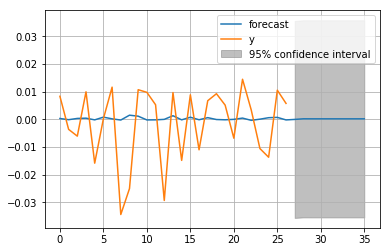

In [18]:
lastIdx = len(AR1_res.fittedvalues)
print(lastIdx)
print(AR1_res.predict(start=3200,end=3235))
AR1_res.plot_predict(start=3200,end=3235)
plt.grid()
plt.show()

In [19]:
# You can see that predict for in-sample, just returns fitted values
AR1_res.fittedvalues[3200] 

0.00028627904535297524

In [20]:
# Selecting other stocks 

import pandas_datareader as pd_data
start_date = '2007-01-03'
end_date = '2019-10-28'
QualComData = pd_data.DataReader('QCOM','yahoo',start_date,end_date)
QualComData.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-22,79.070000,78.239998,78.930000,78.470001,4944500.0,76.249985
2019-10-23,78.129997,76.870003,77.209999,77.239998,5785700.0,75.054779
2019-10-24,79.019997,77.589996,78.059998,78.989998,5271200.0,76.755272
2019-10-25,80.230003,78.910004,79.000000,80.169998,6712300.0,77.901886
2019-10-28,83.129997,80.540001,80.550003,83.050003,9949800.0,80.700417


In [21]:
# Log returns
QualComRtn = np.log(QualComData['Close']).diff().dropna() #diff = log(p(t))- log(p(t-1))= log(p(t)/p(t-1)),continuosly compounded return
QualComRtn.head()
len(QualComRtn)


3227

In [22]:
#Fit an AR(1) model to QualCOm log returns data

model = ARMA(QualComRtn.values, order=(1,0)) #Order of AR is 1, MA is 0.
AR1_res_QC = model.fit()
print(AR1_res_QC.summary());



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3227
Model:                     ARMA(1, 0)   Log Likelihood                8061.287
Method:                       css-mle   S.D. of innovations              0.020
Date:                Wed, 11 Nov 2020   AIC                         -16116.574
Time:                        23:05:50   BIC                         -16098.336
Sample:                             0   HQIC                        -16110.039
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.717      0.474      -0.000       0.001
ar.L1.y       -0.0197      0.018     -1.119      0.263      -0.054       0.015
                                    Roots           

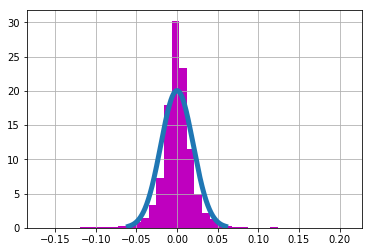

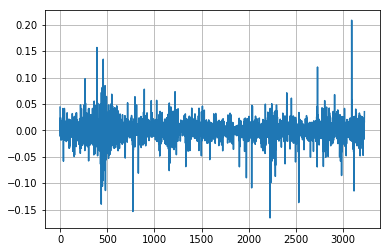

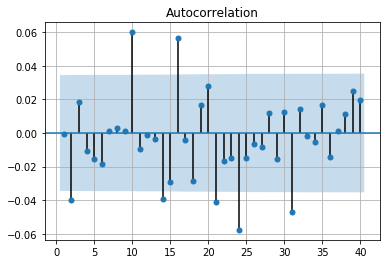

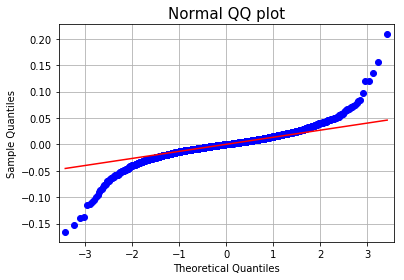

In [23]:
#Returning to AR(1) fitted model and checking for Residual characteristics

resid = AR1_res_QC.resid #residuals
plt.hist(resid, bins =40,color='m', density = True)
mu = resid.mean()
sigma = resid.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
plt.grid()
plt.show()
plt.plot(resid)
plt.grid()
plt.show()
plot_acf(resid,lags=40,zero=False)
plt.grid()
fig = sm.qqplot(AR1_res_QC.resid, line='q')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

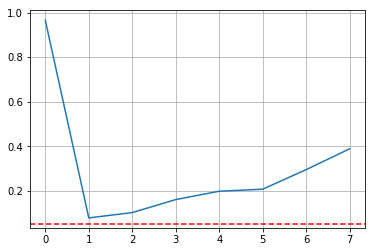

0.3892064080578016

In [24]:
# p-values for terms above 0 of ACF residulas are below 5%

lags = m.floor(np.log(len(resid)))
ljbox_test_res_QCAR1 = sm.stats.acorr_ljungbox(resid,lags)
plt.plot(ljbox_test_res_QCAR1[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()
ljbox_test_res_QCAR1[1][7]

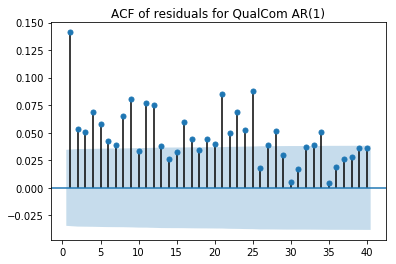

In [25]:
plot_acf(resid**2, lags = 40,zero =False)
plt.title('ACF of residuals for QualCom AR(1)')
plt.show()

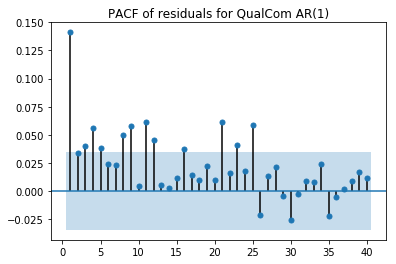

In [26]:
plot_pacf(resid**2, lags = 40,zero =False)
plt.title('PACF of residuals for QualCom AR(1)')
plt.show()

In [27]:
# Retreiveing AEMO prices - retail prices of electricity

df3 = pd.read_csv('AEMOPriceDataSimple.csv', index_col = 0)
df3.head()

,RRP
Date,
01/01/13,46.15
02/01/13,47.72
03/01/13,48.08
04/01/13,49.65
05/01/13,51.56


In [28]:
logprice = np.log(df3)
logprice.head()

,RRP
Date,
01/01/13,3.831897
02/01/13,3.865351
03/01/13,3.872866
04/01/13,3.904998
05/01/13,3.942746


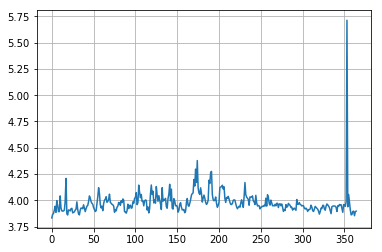

In [29]:
plt.plot(logprice.values)
plt.grid()
plt.show()

In [30]:
percent_replace = 4.266077 # replace with quantile 99%
percent_replace

4.266077

In [31]:
# Do something about outlier (it makes sense in this case)
loc = logprice.idxmax()
logprice['RRP'][loc]=percent_replace

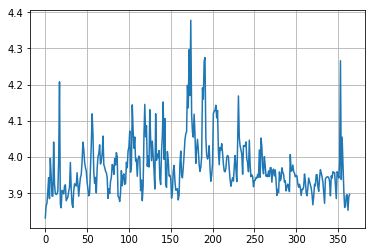

In [32]:
plt.plot(logprice.values)
plt.grid()
plt.show()

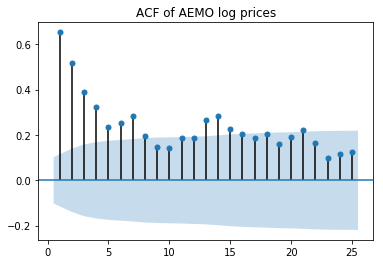

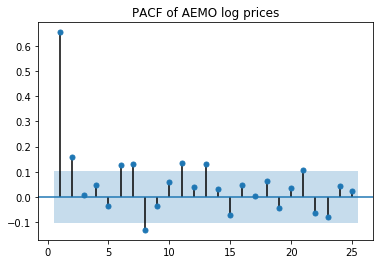

In [33]:
plot_acf(logprice.values, lags = 25, zero=False)
plt.title('ACF of AEMO log prices')
plot_pacf(logprice.values, lags = 25, zero=False)
plt.title('PACF of AEMO log prices')
plt.show()

In [34]:
model3 = ARMA(logprice.values, order=(1,0))
AR1_res_AEMO = model3.fit()
print(AR1_res_AEMO.summary())
AR1_res_AEMO.params

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood                 524.263
Method:                       css-mle   S.D. of innovations              0.057
Date:                Wed, 11 Nov 2020   AIC                          -1042.526
Time:                        23:05:52   BIC                          -1030.826
Sample:                             0   HQIC                         -1037.876
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9712      0.009    451.950      0.000       3.954       3.988
ar.L1.y        0.6592      0.040     16.665      0.000       0.582       0.737
                                    Roots           

array([3.97116366, 0.65921798])

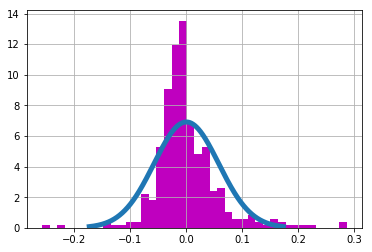

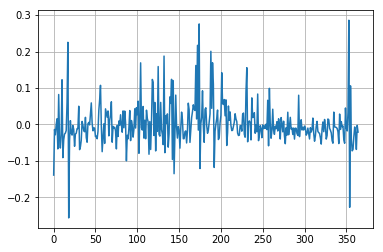

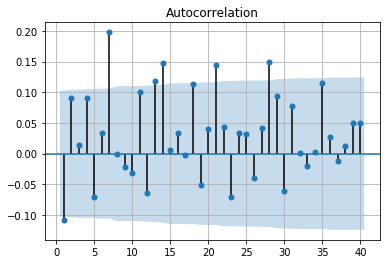

In [35]:
#Returning to AR(1) fitted model and checking for Residual characteristics

resid = AR1_res_AEMO.resid
plt.hist(resid, bins =40,color='m', density = True)
mu = resid.mean()
sigma = resid.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
plt.grid()
plt.show()
plt.plot(resid)
plt.grid()
plt.show()
plot_acf(resid,lags=40,zero=False)
plt.grid()
plt.show()

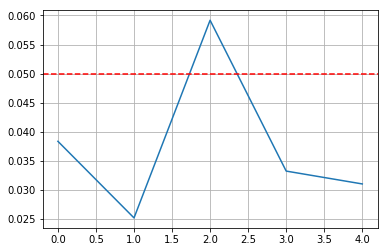

(array([ 4.28848335,  7.36130353,  7.43772365, 10.46694185, 12.28816507]), array([0.03837138, 0.02520654, 0.05918038, 0.03325542, 0.03104563]))


0.031045633307849135

In [36]:
# p-values for terms above 0 of ACF residulas are below 5%

lags = m.floor(np.log(len(resid)))
ljbox_test_res_AEMOAR1 = sm.stats.acorr_ljungbox(resid,lags)
plt.plot(ljbox_test_res_AEMOAR1[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()
print(ljbox_test_res_AEMOAR1)
ljbox_test_res_AEMOAR1[1][4]

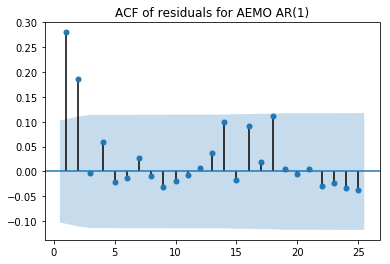

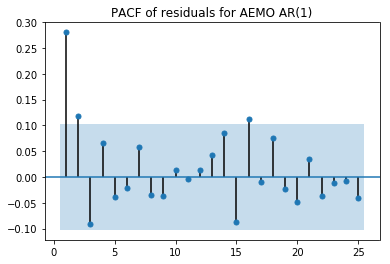

In [37]:
plot_acf(resid**2, lags = 25,zero=False)
plt.title('ACF of residuals for AEMO AR(1)')
plot_pacf(resid**2, lags = 25,zero=False)
plt.title('PACF of residuals for AEMO AR(1)')
plt.show()

Now we would like to predict back in Price Space
===

365
[3.96346089 3.96005732 3.95191873 3.98021999 4.16557584 3.94922621
 4.02637108 3.98107747 3.92979961 3.89836361 3.90099523 3.92020306
 3.92167827 3.89320855 3.91805139 3.92208003 3.93880685 3.94983347
 3.95710241 3.96189423 3.96505308]


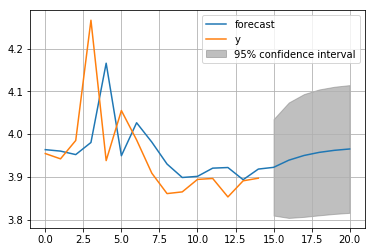

0.05634990346381203

In [38]:
# The graph used below will predict log prices

lastIdx = len(AR1_res_AEMO.fittedvalues)
print(lastIdx)
print(AR1_res_AEMO.predict(start=350,end=370))
AR1_res_AEMO.plot_predict(start=350,end=370)
plt.grid()
plt.show()
np.std(AR1_res_AEMO.predict(start=350,end=370))

Will need to find the values mysel to be able to predict in Price Space!
===

In [39]:
# You can see that predict for in-sample, just returns fitted values
AR1_res_AEMO.fittedvalues[350] 

3.9634608854131184

In [40]:
# The graph used below will predict log prices.
y = logprice[349:365]
y_fitted = (AR1_res_AEMO.fittedvalues[350:365])
print(len(y_fitted))
len(y)

15


16

In [41]:
x_fitted = np.linspace(350,365,15)
x = np.linspace(349,365,16)
print(len(x_fitted))
len(x)

15


16

In [42]:
# Will need the error for the forecast 
sigma_2 = np.mean(AR1_res_AEMO.resid**2) # our best estimate of sigma^2
std_error = np.sqrt(sigma_2)
std_error

0.05769550057358355

In [43]:
# Param of phi from regression - estimated phi
phi_est = AR1_res_AEMO.params[1]
phi_est


0.6592179825288675

In [44]:
def getSEForPredict(phi_est,sigma2,m):
    y=np.zeros(m)
    for i in range(m):
        y[i]=(np.sqrt(sigma2*(1.0-phi_est**(2*i))/(1.0-phi_est**2)))
    return y

In [45]:
y_pred_se = getSEForPredict(AR1_res_AEMO.params[1], sigma_2,6)
y_pred_se

array([0.        , 0.0576955 , 0.0691039 , 0.07351181, 0.07534701,
       0.07613074])

In [46]:
y_predict = AR1_res_AEMO.predict(start=365,end=370)
y_predict_upBound = y_predict + 1.96*y_pred_se
y_predict_lowBound = y_predict - 1.96*y_pred_se
x_pred = np.linspace(365,370,6)
print(len(x_pred))
y_predict
y_fitted.std()

6


0.06586514334575382

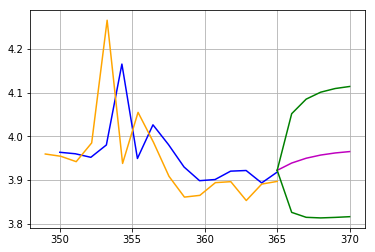

In [47]:
plt.plot(x_fitted,y_fitted,color='blue')
plt.plot(x,y,color='orange')
plt.plot(x_pred,y_predict,color='m')
plt.plot(x_pred,y_predict_upBound, color='g')
plt.plot(x_pred,y_predict_lowBound, color='g')
plt.grid()

Hurray!!!
====

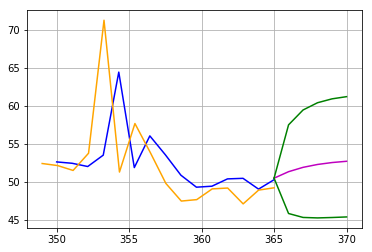

In [48]:
plt.plot(x_fitted,np.exp(y_fitted),color='blue')
plt.plot(x,np.exp(y),color='orange')
plt.plot(x_pred,np.exp(y_predict),color='m')
plt.plot(x_pred,np.exp(y_predict_upBound), color='g')
plt.plot(x_pred,np.exp(y_predict_lowBound), color='g')
plt.grid()

 Examples of AR(2)'s
 ===
 

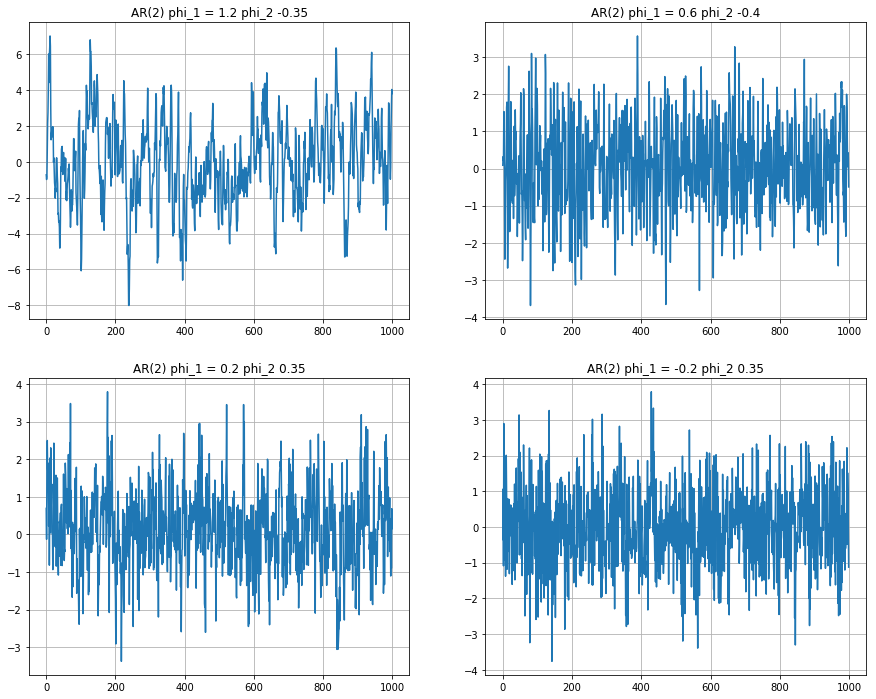

In [49]:
## plt.figure(1, figsize=(15,10)) # overall dimnesions 
# AR(2)

plt.figure(1, figsize=(15,12))

plt.subplot(2,2,1)
plt.title('AR(2) phi_1 = 1.2 phi_2 -0.35')
phi1 = 1.2
phi2 = -0.35
ar2 = np.array([1, - phi1, -phi2])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar2, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2_1 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2_1)
plt.grid()

# AR(2)
plt.subplot(2,2,2)
plt.title('AR(2) phi_1 = 0.6 phi_2 -0.4')
phi1 = 0.6
phi2 = -0.4
ar2 = np.array([1, - phi1, -phi2])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar2, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2_2 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2_2)
plt.grid()

# AR(2)
plt.subplot(2,2,3)
plt.title('AR(2) phi_1 = 0.2 phi_2 0.35')
phi1 = 0.2
phi2 = 0.35
ar2 = np.array([1, - phi1, -phi2])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar2, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2_3 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2_3)
plt.grid()

# AR(2)
plt.subplot(2,2,4)
plt.title('AR(2) phi_1 = -0.2 phi_2 0.35')
phi1 = -0.2
phi2 = 0.35
ar2 = np.array([1, - phi1, -phi2])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar2, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2_4 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2_4)
plt.grid()
plt.show()


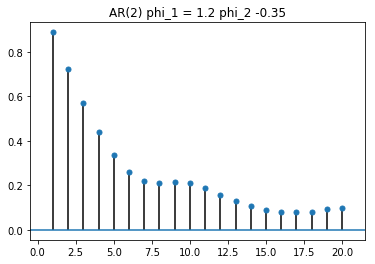

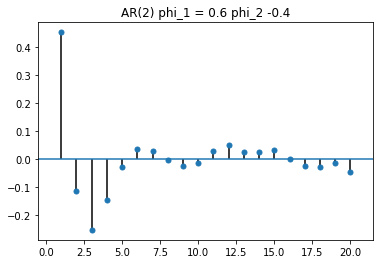

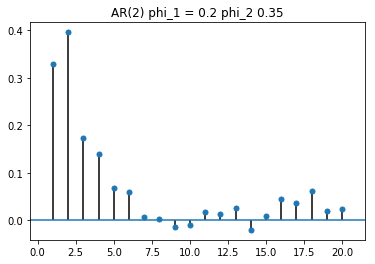

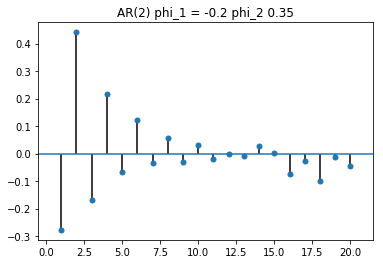

In [50]:
plot_acf(data_ar2_1, alpha =1,  lags = 20,zero=False)
plt.title('AR(2) phi_1 = 1.2 phi_2 -0.35')

plot_acf(data_ar2_2, alpha =1,  lags = 20,zero=False)
plt.title('AR(2) phi_1 = 0.6 phi_2 -0.4')


plot_acf(data_ar2_3, alpha =1,  lags = 20,zero=False)
plt.title('AR(2) phi_1 = 0.2 phi_2 0.35')


plot_acf(data_ar2_4, alpha =1,  lags = 20,zero=False)
plt.title('AR(2) phi_1 = -0.2 phi_2 0.35')
plt.show()


 Examples of MA(q)'s
 ===
 

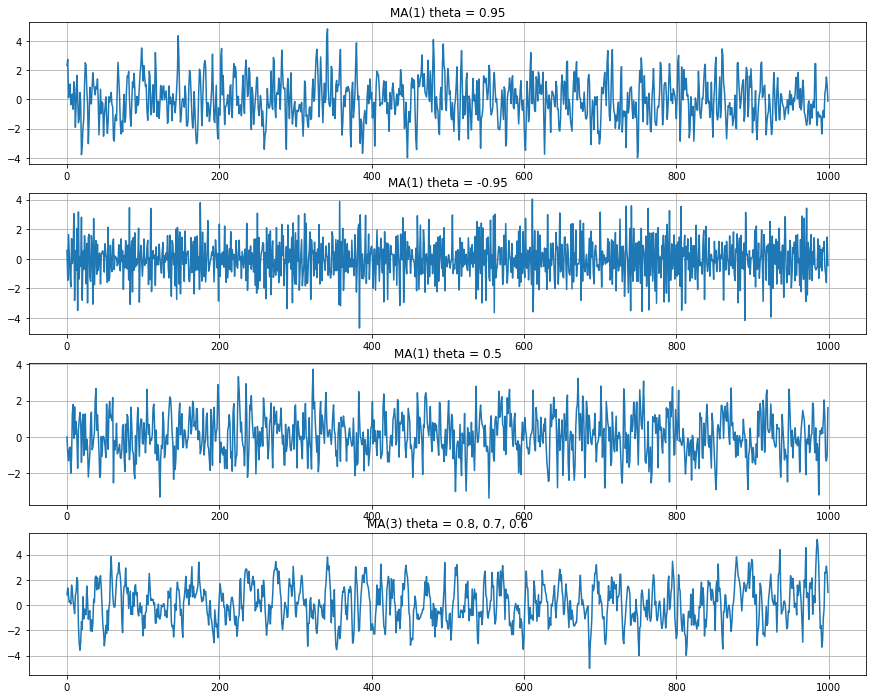

In [51]:
plt.figure(1, figsize=(15,12))
# MA 1 for theta = 0.95
plt.subplot(4,1,1)
plt.title('MA(1) theta = 0.95')
theta = 0.95
MA1_1 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_1)
data_ma1_1 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_1)
plt.grid()

# MA 1 for theta = -0.95
plt.subplot(4,1,2)
plt.title('MA(1) theta = -0.95')
theta = -0.95
MA1_2 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_2)
data_ma1_2 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_2)
plt.grid()

# MA 1 for theta = 0.5
plt.subplot(4,1,3)
plt.title('MA(1) theta = 0.5')
theta = 0.5
MA1_3 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_3)
data_ma1_3 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_3)
plt.grid()

# MA 3 for theta = 0.8, 0.7, 0.6
plt.subplot(4,1,4)
plt.title('MA(3) theta = 0.8, 0.7, 0.6')
theta1 = 0.8
theta2 = 0.7
theta3 = 0.6
MA1_4 = np.array([1, theta1, theta2, theta3])
result1 = ArmaProcess(dummy,MA1_4)
data_ma3_4 = result1.generate_sample(nsample=1000)
plt.plot(data_ma3_4)
plt.grid()



plt.show()

<Figure size 1080x864 with 0 Axes>

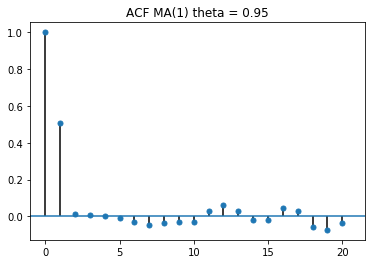

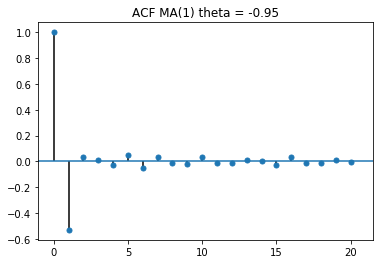

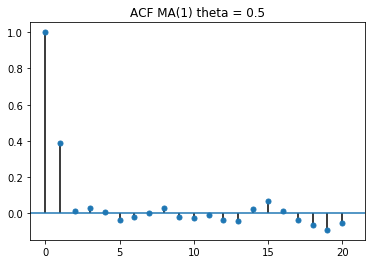

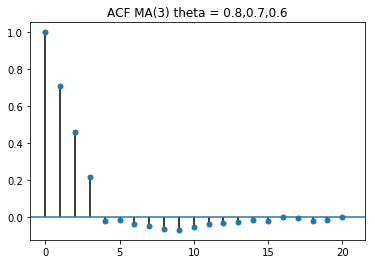

In [52]:
# Charateristic of ACFs for MA(1)

plt.figure(1, figsize=(15,12))

# MA for theta = 0.7 
plot_acf(data_ma1_1, alpha =1,  lags = 20,zero=True)
plt.title('ACF MA(1) theta = 0.95')
plt.show()

# MA for theta = -0.7
plot_acf(data_ma1_2, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(1) theta = -0.95')
plt.show()

# MA for theta = 0 # this is more like random walk
plot_acf(data_ma1_3, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(1) theta = 0.5')

# MA for theta = 0 # this is more like random walk
plot_acf(data_ma3_4, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(3) theta = 0.8,0.7,0.6')


plt.show()

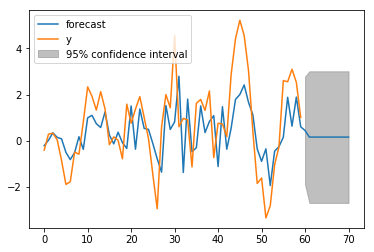

In [53]:
mod = ARMA(data_ma3_4, order=(0,1))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.show()

 Examples of MA(q)'s
 ===
 

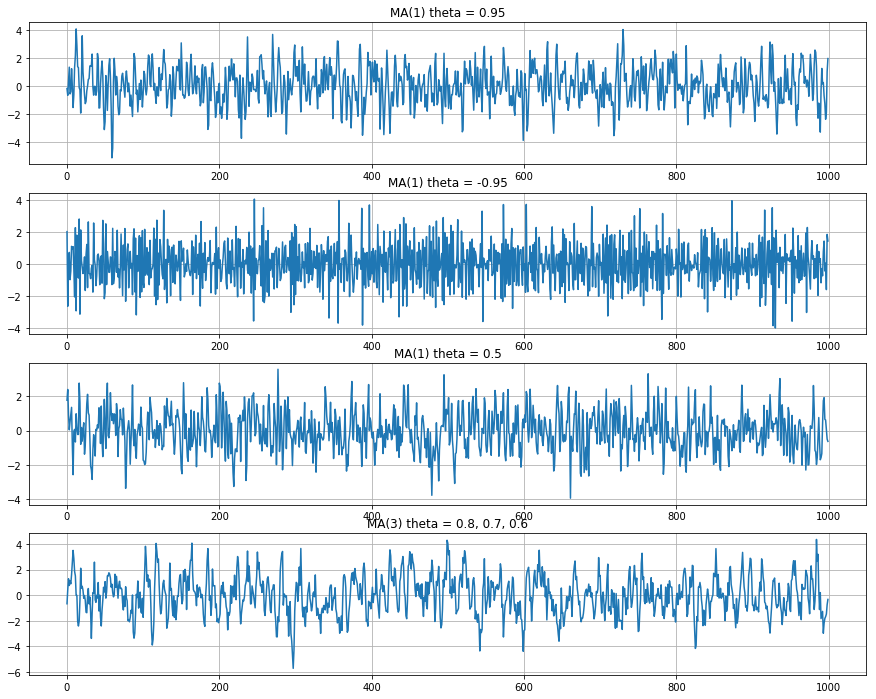

In [54]:
plt.figure(1, figsize=(15,12))
# MA 1 for theta = 0.95
plt.subplot(4,1,1)
plt.title('MA(1) theta = 0.95')
theta = 0.95
MA1_1 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_1)
data_ma1_1 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_1)
plt.grid()

# MA 1 for theta = -0.95
plt.subplot(4,1,2)
plt.title('MA(1) theta = -0.95')
theta = -0.95
MA1_2 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_2)
data_ma1_2 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_2)
plt.grid()

# MA 1 for theta = 0.5
plt.subplot(4,1,3)
plt.title('MA(1) theta = 0.5')
theta = 0.5
MA1_3 = np.array([1, theta])
dummy = np.array([1])
result1 = ArmaProcess(dummy,MA1_3)
data_ma1_3 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1_3)
plt.grid()

# MA 3 for theta = 0.8, 0.7, 0.6
plt.subplot(4,1,4)
plt.title('MA(3) theta = 0.8, 0.7, 0.6')
theta1 = 0.8
theta2 = 0.7
theta3 = 0.6
MA1_4 = np.array([1, theta1, theta2, theta3])
result1 = ArmaProcess(dummy,MA1_4)
data_ma3_4 = result1.generate_sample(nsample=1000)
plt.plot(data_ma3_4)
plt.grid()



plt.show()

<Figure size 1080x864 with 0 Axes>

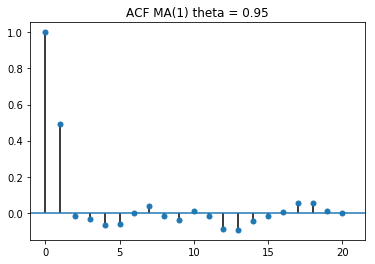

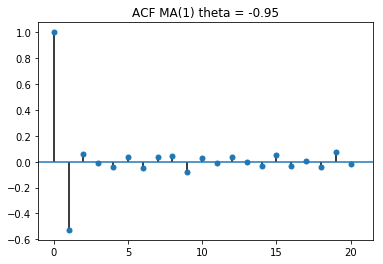

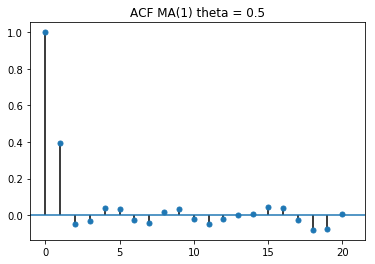

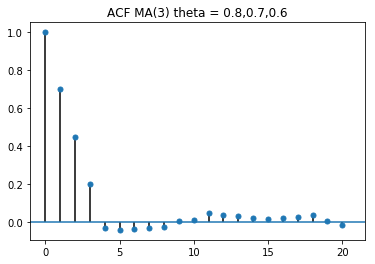

In [55]:
# Charateristic of ACFs for MA(1)

plt.figure(1, figsize=(15,12))

# MA for theta = 0.7 
plot_acf(data_ma1_1, alpha =1,  lags = 20,zero=True)
plt.title('ACF MA(1) theta = 0.95')
plt.show()

# MA for theta = -0.7
plot_acf(data_ma1_2, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(1) theta = -0.95')
plt.show()

# MA for theta = 0 # this is more like random walk
plot_acf(data_ma1_3, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(1) theta = 0.5')

# MA for theta = 0 # this is more like random walk
plot_acf(data_ma3_4, alpha =1, lags = 20,zero=True)
plt.title('ACF MA(3) theta = 0.8,0.7,0.6')


plt.show()

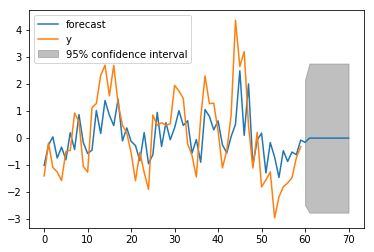

In [56]:
mod = ARMA(data_ma3_4, order=(0,1))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.show()